#### Exercise 1 - Kaggle Big Dataset - Reviews

### Important Libraries

In [229]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml


#sklearn
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer,balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import GridSearchCV,KFold

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
    
from sklearn.pipeline import Pipeline


### Loading the data

In [141]:
# train data
reviews_train = pd.read_csv('data/reviews/amazon_review_ID.shuf.lrn.csv')

#test data

reviews_test = pd.read_csv('data/reviews/amazon_review_ID.shuf.tes.csv')


### Data Preprocessing and Exploration

In [142]:
# Number of samples and number of attributes
num_samples = reviews_train.shape[0]
num_attributes = reviews_train.shape[1] - 1 # last one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  750
The number of attributes is:  10001


In [143]:
# checking for null values
reviews_train.isna().sum()

ID        0
V1        0
V2        0
V3        0
V4        0
         ..
V9997     0
V9998     0
V9999     0
V10000    0
Class     0
Length: 10002, dtype: int64

In [144]:
#print number of unknown values:
num_unknown = 0
for n in reviews_train.columns:
  num_unknown_per_feature = reviews_train.loc[:,n].isin(['unknown']).sum(axis=0)
  num_unknown += num_unknown_per_feature
  print(n, ':', num_unknown_per_feature)
print('total unknown:', num_unknown)



ID : 0
V1 : 0
V2 : 0
V3 : 0
V4 : 0
V5 : 0
V6 : 0
V7 : 0
V8 : 0
V9 : 0
V10 : 0
V11 : 0
V12 : 0
V13 : 0
V14 : 0
V15 : 0
V16 : 0
V17 : 0
V18 : 0
V19 : 0
V20 : 0
V21 : 0
V22 : 0
V23 : 0
V24 : 0
V25 : 0
V26 : 0
V27 : 0
V28 : 0
V29 : 0
V30 : 0
V31 : 0
V32 : 0
V33 : 0
V34 : 0
V35 : 0
V36 : 0
V37 : 0
V38 : 0
V39 : 0
V40 : 0
V41 : 0
V42 : 0
V43 : 0
V44 : 0
V45 : 0
V46 : 0
V47 : 0
V48 : 0
V49 : 0
V50 : 0
V51 : 0
V52 : 0
V53 : 0
V54 : 0
V55 : 0
V56 : 0
V57 : 0
V58 : 0
V59 : 0
V60 : 0
V61 : 0
V62 : 0
V63 : 0
V64 : 0
V65 : 0
V66 : 0
V67 : 0
V68 : 0
V69 : 0
V70 : 0
V71 : 0
V72 : 0
V73 : 0
V74 : 0
V75 : 0
V76 : 0
V77 : 0
V78 : 0
V79 : 0
V80 : 0
V81 : 0
V82 : 0
V83 : 0
V84 : 0
V85 : 0
V86 : 0
V87 : 0
V88 : 0
V89 : 0
V90 : 0
V91 : 0
V92 : 0
V93 : 0
V94 : 0
V95 : 0
V96 : 0
V97 : 0
V98 : 0
V99 : 0
V100 : 0
V101 : 0
V102 : 0
V103 : 0
V104 : 0
V105 : 0
V106 : 0
V107 : 0
V108 : 0
V109 : 0
V110 : 0
V111 : 0
V112 : 0
V113 : 0
V114 : 0
V115 : 0
V116 : 0
V117 : 0
V118 : 0
V119 : 0
V120 : 0
V121 : 0
V122 : 0
V12

In [145]:
reviews_train.dtypes

ID         int64
V1         int64
V2         int64
V3         int64
V4         int64
           ...  
V9997      int64
V9998      int64
V9999      int64
V10000     int64
Class     object
Length: 10002, dtype: object

In [146]:
# # Plotting the categorical variables
# categorical_columns = reviews_train.columns.difference(['ID','Class'])

In [147]:
# plt.figure(figsize=(20,30))
# for i,column in enumerate(categorical_columns):
#     plt.subplot(4, 4, i+1)
#     sns.histplot(x=congress_train[column],hue =congress_train['class'],multiple = 'stack')
#     plt.xlabel(column)
#     plt.xticks(rotation=90)
# plt.suptitle("Distribution between the 2 classes ", fontsize=20)
# plt.show()

##### Preparing data for model fitting

In [148]:
# List of possible classes
print("List of unique class labels:",'\n',reviews_train['Class'].unique())
print('\n')
print('Number of unique class labels','\n',reviews_train['Class'].nunique())


List of unique class labels: 
 ['Grove' 'Chell' 'Auken' 'Davisson' 'Vision' 'Harp' 'Calvinnme' 'Vernon'
 'Cutey' 'Hayes' 'Robert' 'Wilson' 'Sherwin' 'Lee' 'Mahlers2nd' 'Merritt'
 'Power' 'Lovitt' 'Peterson' 'Nigam' 'Agresti' 'Comdet' 'Blankenship'
 'Chandler' 'Walters' 'Mark' 'Neal' 'Brody' 'Mitchell' 'Taylor' 'Shea'
 'Chachra' 'Messick' 'Kolln' 'Ashbacher' 'Johnson' 'Koenig' 'Corn' 'Brown'
 'Riley' 'Engineer' 'Lawyeraau' 'Janson' 'McKee' 'Dent' 'Cholette'
 'Goonan' 'CFH' 'Bukowsky' 'Morrison']


Number of unique class labels 
 50


In [149]:
reviews_train['class'] = reviews_train['Class'].factorize()[0]

- As seen below, there is only one unique class in y_test. Therefore, we are going to replace its value with the encoded value that this class has on train.

In [150]:
X = reviews_train.drop(['class','Class'], axis=1)
Y = reviews_train['class']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 1234,stratify=Y)

#### Dimensionality Reduction


In [208]:
# components = None

# pca = PCA(n_components= components)

# #performing PCA on the train data
# pca.fit(X_train)



# # print the explained variances
# print("Variances (Percentage):")
# print(pca.explained_variance_ratio_ * 100)
# print()




# # plot a scree plot
# components = components
# plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.axhline(y=95, color='r', linestyle='-')
# plt.text(0.5, 95, '95% cut-off threshold', color = 'red', fontsize=10,verticalalignment = 'bottom')
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance (%)")
# plt.show()




# pca = PCA(n_components = 0.95)
# pca.fit(X_train)
# components = len(pca.explained_variance_ratio_)
# print(f'Number of components: {components}')




# _sc = StandardScaler()
# _pca = PCA(n_components = components)
# X_train_pca = _pca.fit_transform(_sc.fit_transform(X_train))
# X_test_pca = _pca.transform(_sc.transform(X_test))

#### Linear Discriminant Analysis

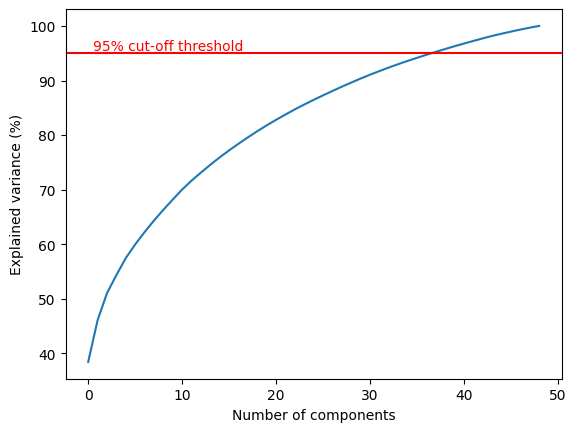

In [209]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X_train, y_train)
# plot a scree plot
plt.plot(np.cumsum(lda.explained_variance_ratio_ * 100))
plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 95, '95% cut-off threshold', color = 'red', fontsize=10,verticalalignment = 'bottom')
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [222]:
_sc = StandardScaler()
_pca = PCA(n_components = 35)
X_train_lda = _pca.fit_transform(_sc.fit_transform(X_train),y_train)
X_test_lda = _pca.transform(_sc.transform(X_test))

#### Decision Tree

##### Tree 1

In [276]:
def evaluate(model,X_train = X_train_lda,X_test = X_test_lda,y_train = y_train,y_test=y_test):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # accuracy
    print("#"*20)
    print("Accuracy on train: {:.2f} %".format(accuracy_score(y_true = y_train, y_pred = y_train_predict)*100))
    print("Accuracy on test: {:.2f} %".format(accuracy_score(y_test, y_test_predict)*100))
    print("#"*20)
    print("Recall on train: {:.2f} %".format(recall_score(y_true = y_train, y_pred = y_train_predict,average = 'macro')*100))
    print("Recall on test: {:.2f} %".format(recall_score(y_true = y_test, y_pred = y_test_predict,average = 'macro')*100))
    print("#"*20)
    print("Precision on train: {:.2f} %".format(precision_score(y_true = y_train, y_pred = y_train_predict,average = 'macro')*100))
    print("Precision on test: {:.2f} %".format(precision_score(y_true = y_test, y_pred = y_test_predict,average = 'macro')*100))
      


In [227]:
tree_1 = tree.DecisionTreeClassifier(random_state=1)
tree_1.fit(X_train_lda,y_train)
evaluate(tree_1,X_train = X_train_lda,X_test = X_test_lda)

####################
Accuracy on train: 100.00 %
Accuracy on test: 16.67 %
####################
Recall on train: 100.00 %
Recall on test: 15.83 %
####################
Precision on train: 100.00 %
Precision on test: 22.11 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
features = X_train.columns
def plottree(model):
    plt.figure(figsize=(20,30))
    plot = tree.plot_tree(model,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
    for o in plot:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()


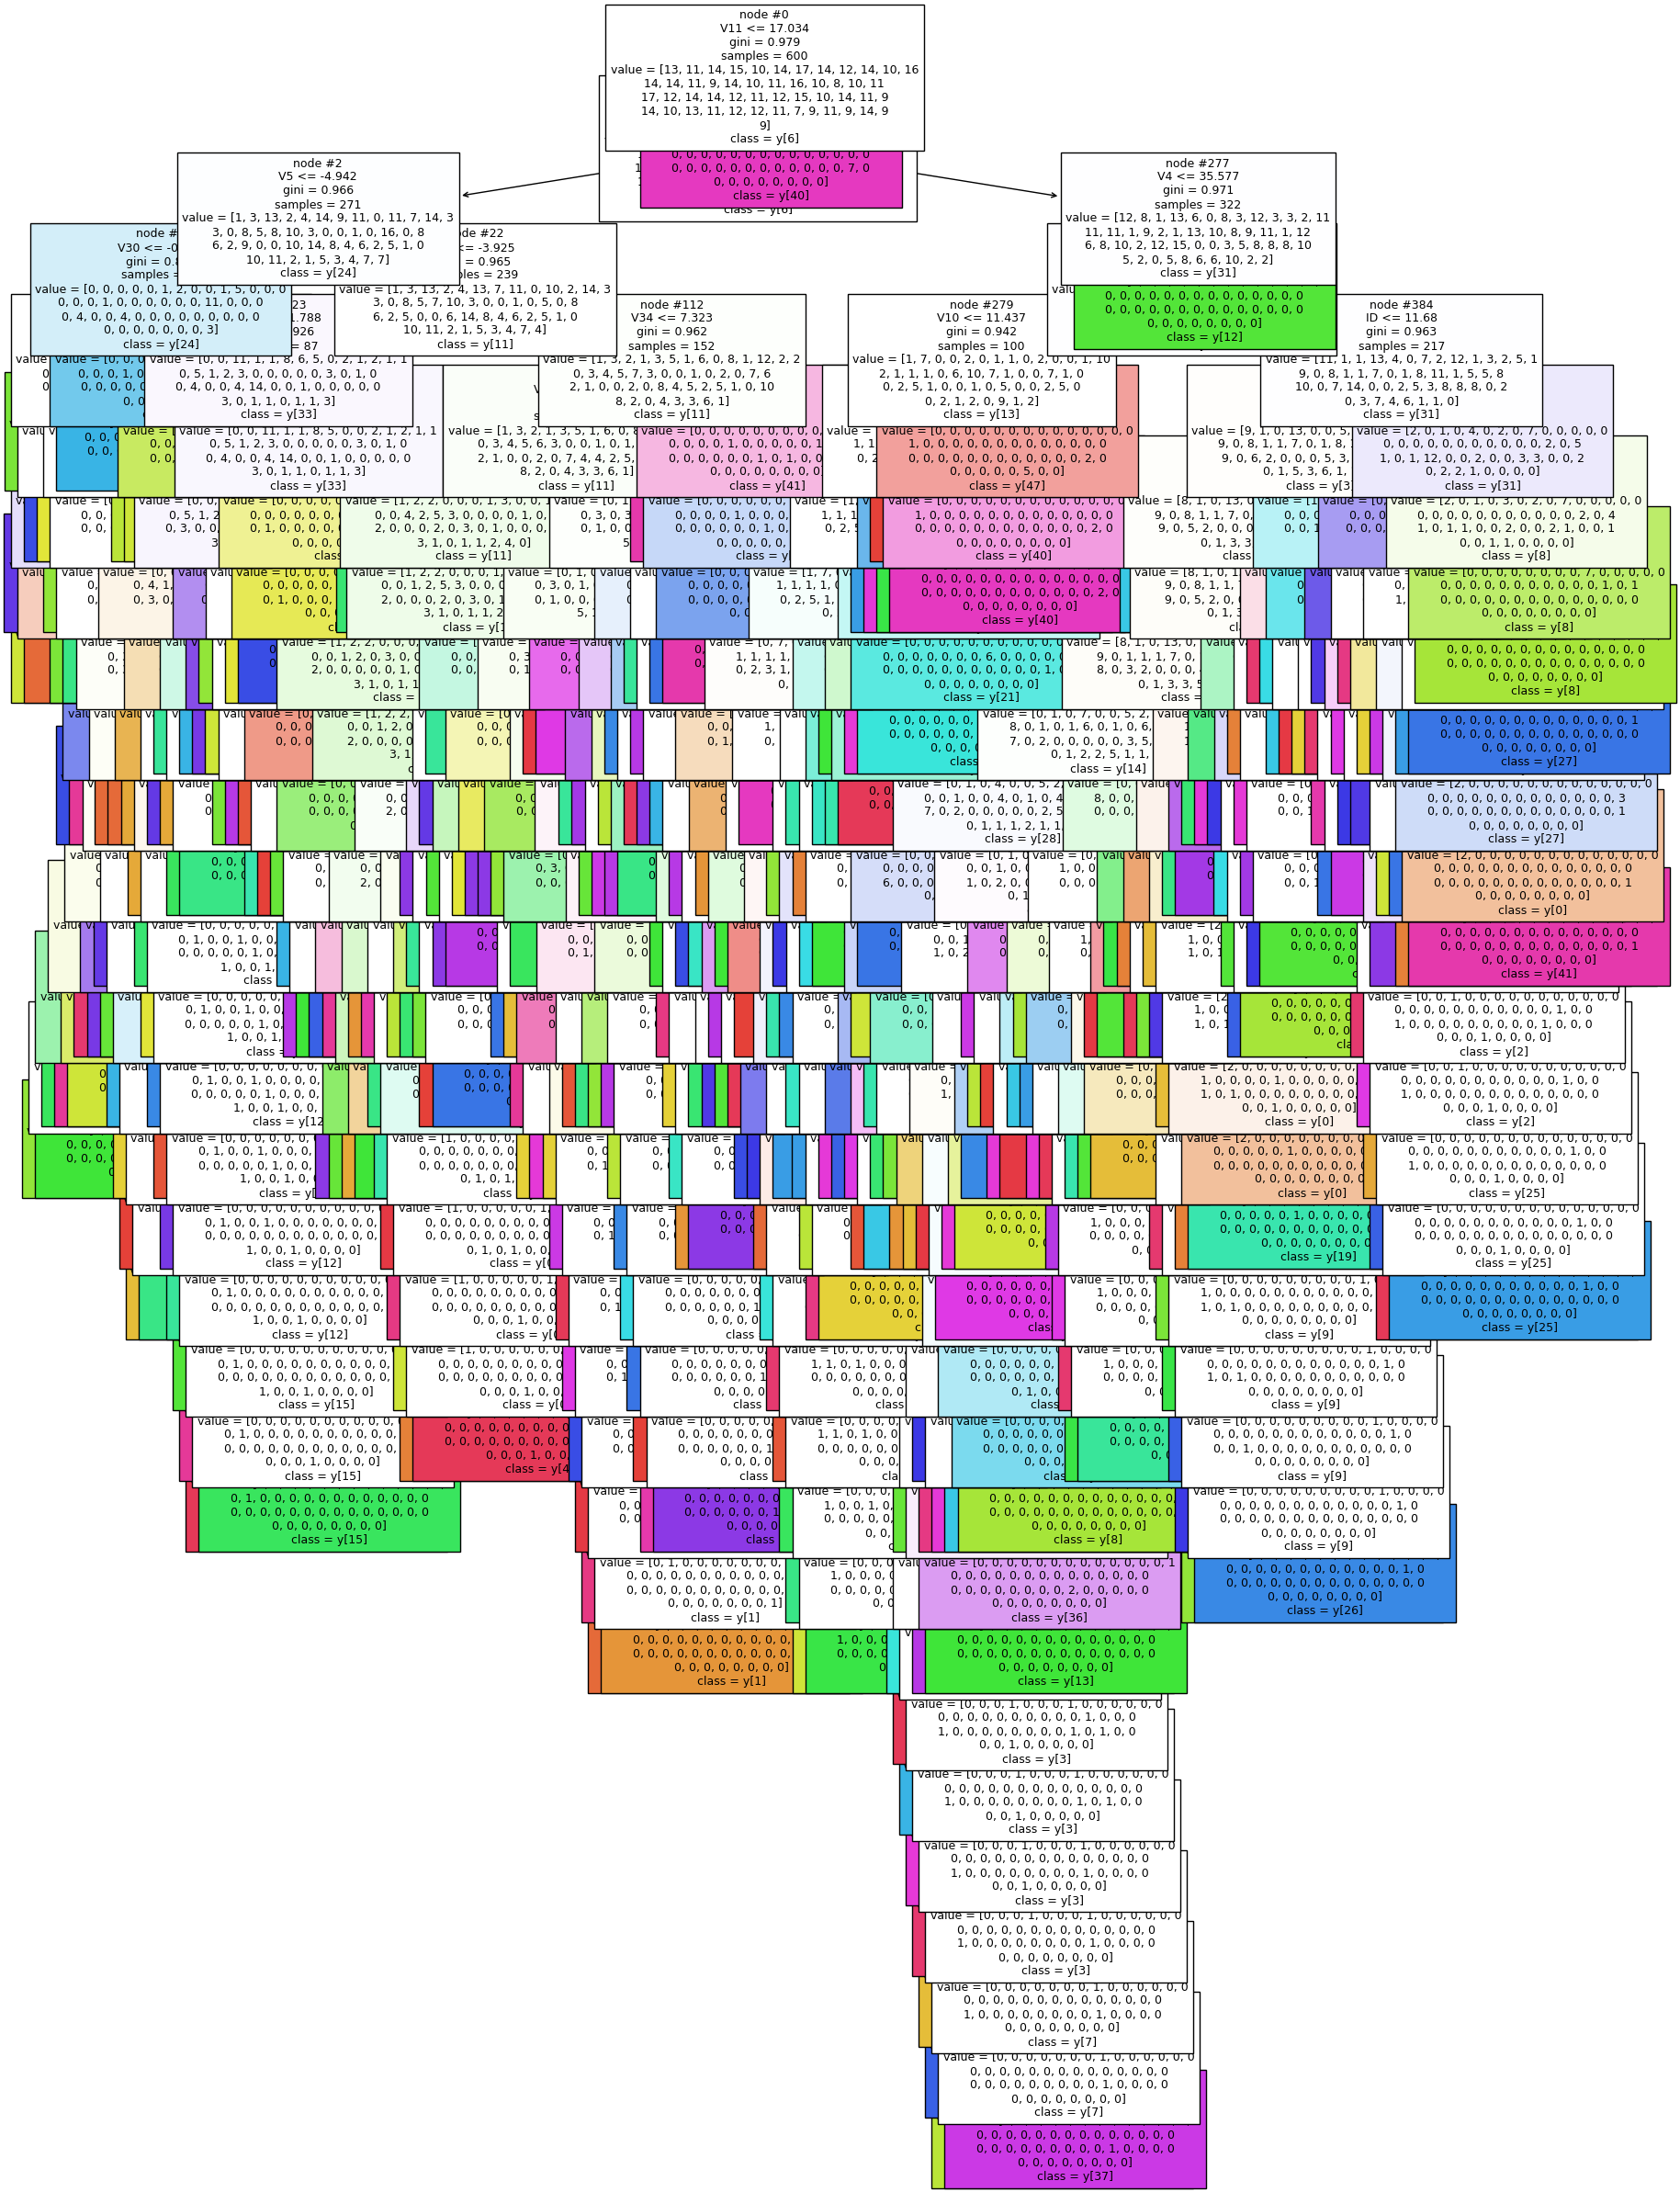

In [233]:
plottree(tree_1)

In [234]:
def plot_features(model):
    feat_dict= {}
    for col, val in sorted(zip(features, model.feature_importances_),key=lambda x:x[1],reverse=True):
        feat_dict[col]=val
    feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
    values = feat_df.Importance    
    idx = feat_df.Feature
    plt.figure(figsize=(10,8))
    clrs = ['navy']
    sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict client subscription')
    plt.show()

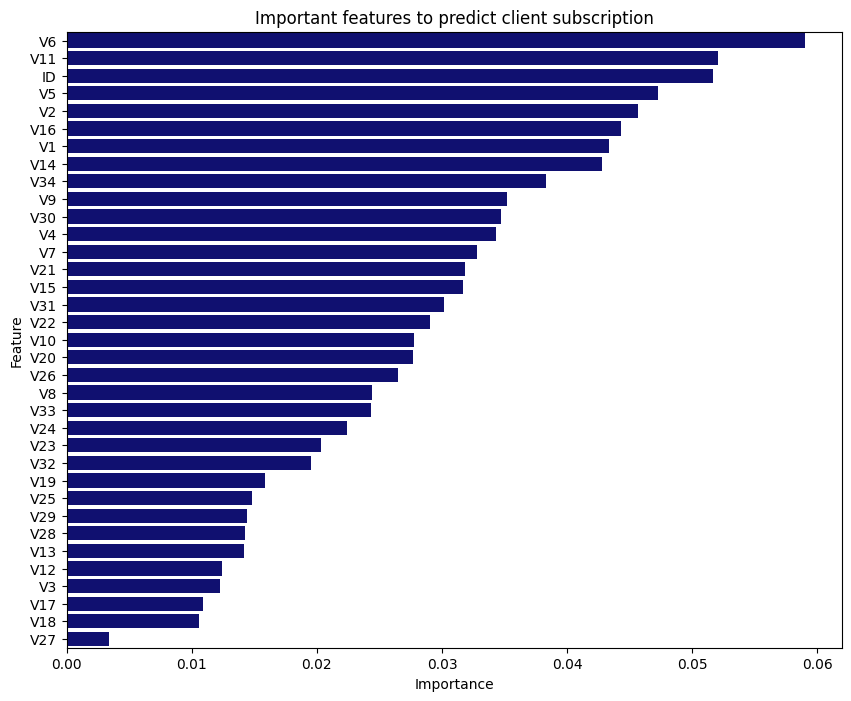

In [237]:
plot_features(tree_1)

#### Tree Model 2 with best features

In [ ]:
tree_2 = DecisionTreeClassifier(random_state = 1)

tree_2.fit(X_train_lda[:,: 27],y_train)

In [269]:
evaluate(tree_2,X_train = X_train_lda[:,:27],X_test = X_test_lda[:,:27])

####################
Accuracy on train: 100.00 %
Accuracy on test: 22.00 %
####################
Recall on train: 100.00 %
Recall on test: 21.17 %
####################
Precision on train: 100.00 %
Precision on test: 23.73 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### One vs One Classifier with Decision Tree

In [273]:

tree_3 = DecisionTreeClassifier(random_state=1)

tree_ovo = OneVsOneClassifier(tree_3)

In [277]:
tree_ovo.fit(X_train_lda,y_train)

OneVsOneClassifier(estimator=DecisionTreeClassifier(random_state=1))

In [278]:
evaluate(tree_ovo)

####################
Accuracy on train: 100.00 %
Accuracy on test: 30.67 %
####################
Recall on train: 100.00 %
Recall on test: 29.67 %
####################
Precision on train: 100.00 %
Precision on test: 28.97 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observations:
- Using One vs One classifier has improved the performance of the decision tree. Next, we will use KFold cross validation and Gridsearch to find best combination of parameters

####  Hyperparameter tuning and cross validation

In [288]:
# Define the decision tree model
dt = DecisionTreeClassifier(random_state=1)

# Define the OvO classifier with the decision tree model
ovo = OneVsOneClassifier(dt)

# Define the hyperparameter grid for the decision tree
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [2, 4, 6, 8, 10],
             'max_leaf_nodes' : [5, 10,15,20,25,30,35,40,45,50],}

# Define the hyperparameter grid for the OvO classifier
ovo_params = {'estimator__criterion': ['gini', 'entropy'],
              'estimator__max_depth': [2, 4, 6, 8, 10],
              'estimator__max_leaf_nodes': [5, 10,15,20,25,30,35,40,45,50],}

              
kf = KFold(n_splits= 5, shuffle=True, random_state=1)
# Define the GridSearchCV object
grid = GridSearchCV(estimator=ovo, param_grid=ovo_params, cv=kf)

grid = grid.fit(X_train_lda,y_train)

In [291]:
best_tree_lda = grid.best_estimator_

In [290]:
best_tree_lda.fit(X_train_lda,y_train)
evaluate(best_tree_lda)

####################
Accuracy on train: 98.50 %
Accuracy on test: 31.33 %
####################
Recall on train: 98.76 %
Recall on test: 30.00 %
####################
Precision on train: 98.61 %
Precision on test: 31.25 %


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
